## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
lr = 0.001
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUMS = [0.1,0.3,0.5,0.7,0.9]

In [7]:
results = {}
for MOMENTUM in MOMENTUMS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(MOMENTUM)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0810 20:22:35.974544 13916 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0810 20:22:35.975542 13916 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0810 20:22:35.991498 13916 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 20:22:35.991498 13916 deprecation_wrapper.py:119] From c:\users\user\anaconda3\envs\keras37\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.pl

Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 4s 89us/step - loss: 2.2590 - acc: 0.1723 - val_loss: 2.2008 - val_acc: 0.2020
Epoch 2/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.1593 - acc: 0.2364 - val_loss: 2.1190 - val_acc: 0.2586
Epoch 3/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.0851 - acc: 0.2747 - val_loss: 2.0525 - val_acc: 0.2867
Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.0268 - acc: 0.2967 - val_loss: 2.0042 - val_acc: 0.3075
Epoch 5/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.9822 - acc: 0.3145 - val_loss: 1.9635 - val_acc: 0.3182
Epoch 6/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.9468 - acc: 0.3259 - val_loss: 1.9339 - val_acc: 0.3273
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.9190 - acc: 0.3349 - val_loss: 1.9084 - val_acc

50000/50000 [==============================] - 4s 84us/step - loss: 2.0914 - acc: 0.2772 - val_loss: 2.0530 - val_acc: 0.2770
Epoch 3/50
50000/50000 [==============================] - 4s 85us/step - loss: 2.0162 - acc: 0.3038 - val_loss: 1.9926 - val_acc: 0.3015
Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.9653 - acc: 0.3201 - val_loss: 1.9501 - val_acc: 0.3171
Epoch 5/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.9279 - acc: 0.3325 - val_loss: 1.9163 - val_acc: 0.3310
Epoch 6/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.8984 - acc: 0.3432 - val_loss: 1.8941 - val_acc: 0.3370
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.8747 - acc: 0.3511 - val_loss: 1.8692 - val_acc: 0.3482
Epoch 8/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.8544 - acc: 0.3565 - val_loss: 1.8509 - val_acc: 0.3505
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.9001 - acc: 0.3351 - val_loss: 1.8780 - val_acc: 0.3428
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8636 - acc: 0.3452 - val_loss: 1.8488 - val_acc: 0.3513
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.8352 - acc: 0.3566 - val_loss: 1.8214 - val_acc: 0.3592
Epoch 7/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.8097 - acc: 0.3669 - val_loss: 1.8057 - val_acc: 0.3659
Epoch 8/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.7889 - acc: 0.3726 - val_loss: 1.7771 - val_acc: 0.3747
Epoch 9/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.7698 - acc: 0.3797 - val_loss: 1.7595 - val_acc: 0.3866
Epoch 10/50
50000/50000 [==============================] - 4s 85us/step - loss: 1.7516 - acc: 0.3866 - val_loss: 1.7470 - val_acc: 0.3830
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 4s 85us/step - loss: 1.7157 - acc: 0.3998 - val_loss: 1.7007 - val_acc: 0.4065
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.6825 - acc: 0.4115 - val_loss: 1.6766 - val_acc: 0.4059
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.6541 - acc: 0.4226 - val_loss: 1.6440 - val_acc: 0.4248
Epoch 8/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.6274 - acc: 0.4311 - val_loss: 1.6363 - val_acc: 0.4211
Epoch 9/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.6041 - acc: 0.4407 - val_loss: 1.6018 - val_acc: 0.4365
Epoch 10/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.5801 - acc: 0.4493 - val_loss: 1.5922 - val_acc: 0.4365
Epoch 11/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5606 - acc: 0.4548 - val_loss: 1.5701 - val_acc: 0.4444
Epoch 12/50
50000/50000 [=========================

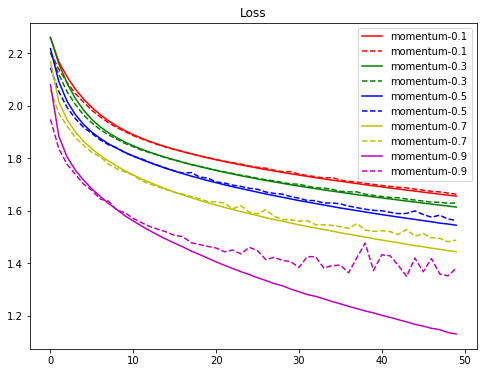

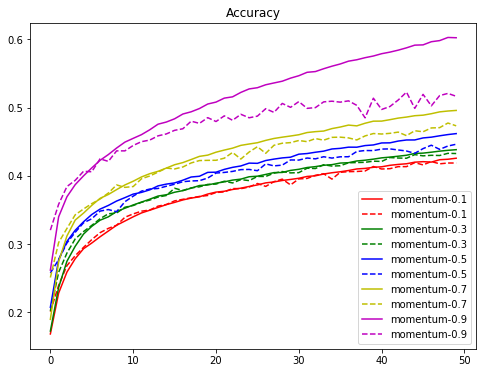

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
results = {}
for MOMENTUM in MOMENTUMS:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(MOMENTUM)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.001000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.2289 - acc: 0.1839 - val_loss: 2.1665 - val_acc: 0.2231
Epoch 2/50
50000/50000 [==============================] - 4s 83us/step - loss: 2.1277 - acc: 0.2455 - val_loss: 2.0897 - val_acc: 0.2713
Epoch 3/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.0624 - acc: 0.2809 - val_loss: 2.0342 - val_acc: 0.2952
Epoch 4/50
50000/50000 [==============================] - 4s 79us/step - loss: 2.0139 - acc: 0.3018 - val_loss: 1.9925 - val_acc: 0.3143
Epoch 5/50
50000/50000 [==============================] - 4s 78us/step - loss: 1.9760 - acc: 0.3179 - val_loss: 1.9587 - val_acc: 0.3255
Epoch 6/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.9458 - acc: 0.3289 - val_loss: 1.9340 - val_acc: 0.3331
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.9214 - acc: 0.3373 - val_loss: 1.9107 - val_acc

50000/50000 [==============================] - 4s 79us/step - loss: 2.1103 - acc: 0.2503 - val_loss: 2.0659 - val_acc: 0.2774
Epoch 3/50
50000/50000 [==============================] - 4s 80us/step - loss: 2.0354 - acc: 0.2839 - val_loss: 2.0030 - val_acc: 0.3021
Epoch 4/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.9810 - acc: 0.3058 - val_loss: 1.9560 - val_acc: 0.3178
Epoch 5/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.9395 - acc: 0.3208 - val_loss: 1.9205 - val_acc: 0.3312
Epoch 6/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.9074 - acc: 0.3333 - val_loss: 1.8934 - val_acc: 0.3344
Epoch 7/50
50000/50000 [==============================] - 4s 79us/step - loss: 1.8813 - acc: 0.3434 - val_loss: 1.8702 - val_acc: 0.3448
Epoch 8/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.8602 - acc: 0.3502 - val_loss: 1.8515 - val_acc: 0.3568
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8849 - acc: 0.3377 - val_loss: 1.8656 - val_acc: 0.3514
Epoch 5/50
50000/50000 [==============================] - 5s 92us/step - loss: 1.8481 - acc: 0.3539 - val_loss: 1.8362 - val_acc: 0.3598
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.8188 - acc: 0.3646 - val_loss: 1.8062 - val_acc: 0.3685
Epoch 7/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.7946 - acc: 0.3731 - val_loss: 1.7889 - val_acc: 0.3769
Epoch 8/50
50000/50000 [==============================] - 4s 89us/step - loss: 1.7731 - acc: 0.3794 - val_loss: 1.7667 - val_acc: 0.3837
Epoch 9/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7543 - acc: 0.3882 - val_loss: 1.7503 - val_acc: 0.3894
Epoch 10/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.7378 - acc: 0.3916 - val_loss: 1.7353 - val_acc: 0.3941
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 4s 82us/step - loss: 1.7349 - acc: 0.3924 - val_loss: 1.7163 - val_acc: 0.3942
Epoch 6/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.7020 - acc: 0.4037 - val_loss: 1.6825 - val_acc: 0.4103
Epoch 7/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6729 - acc: 0.4144 - val_loss: 1.6604 - val_acc: 0.4194
Epoch 8/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.6478 - acc: 0.4218 - val_loss: 1.6370 - val_acc: 0.4247
Epoch 9/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.6211 - acc: 0.4331 - val_loss: 1.6123 - val_acc: 0.4327
Epoch 10/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.6009 - acc: 0.4402 - val_loss: 1.6110 - val_acc: 0.4339
Epoch 11/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.5799 - acc: 0.4464 - val_loss: 1.5929 - val_acc: 0.4348
Epoch 12/50
50000/50000 [=========================

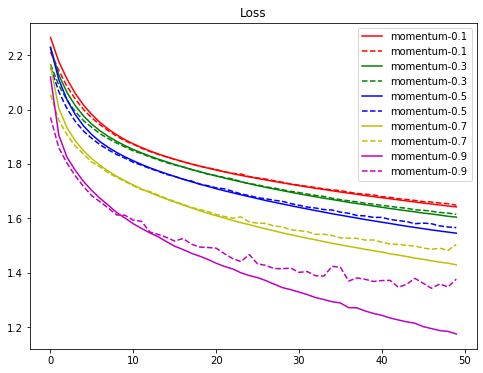

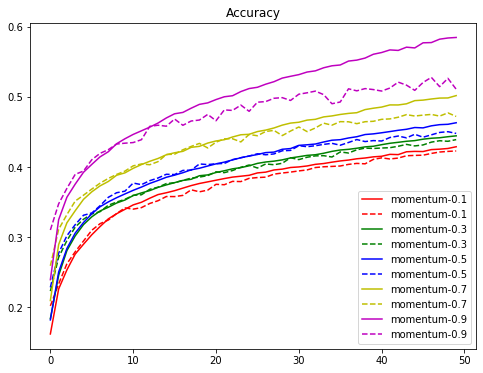

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()